平均準確度: 0.69
模型準確率: 0.7464788732394366
              precision    recall  f1-score   support

          新增       0.74      0.91      0.82        34
        保持不變       0.45      0.31      0.37        16
          減少       0.94      0.81      0.87        21

    accuracy                           0.75        71
   macro avg       0.71      0.68      0.69        71
weighted avg       0.74      0.75      0.73        71



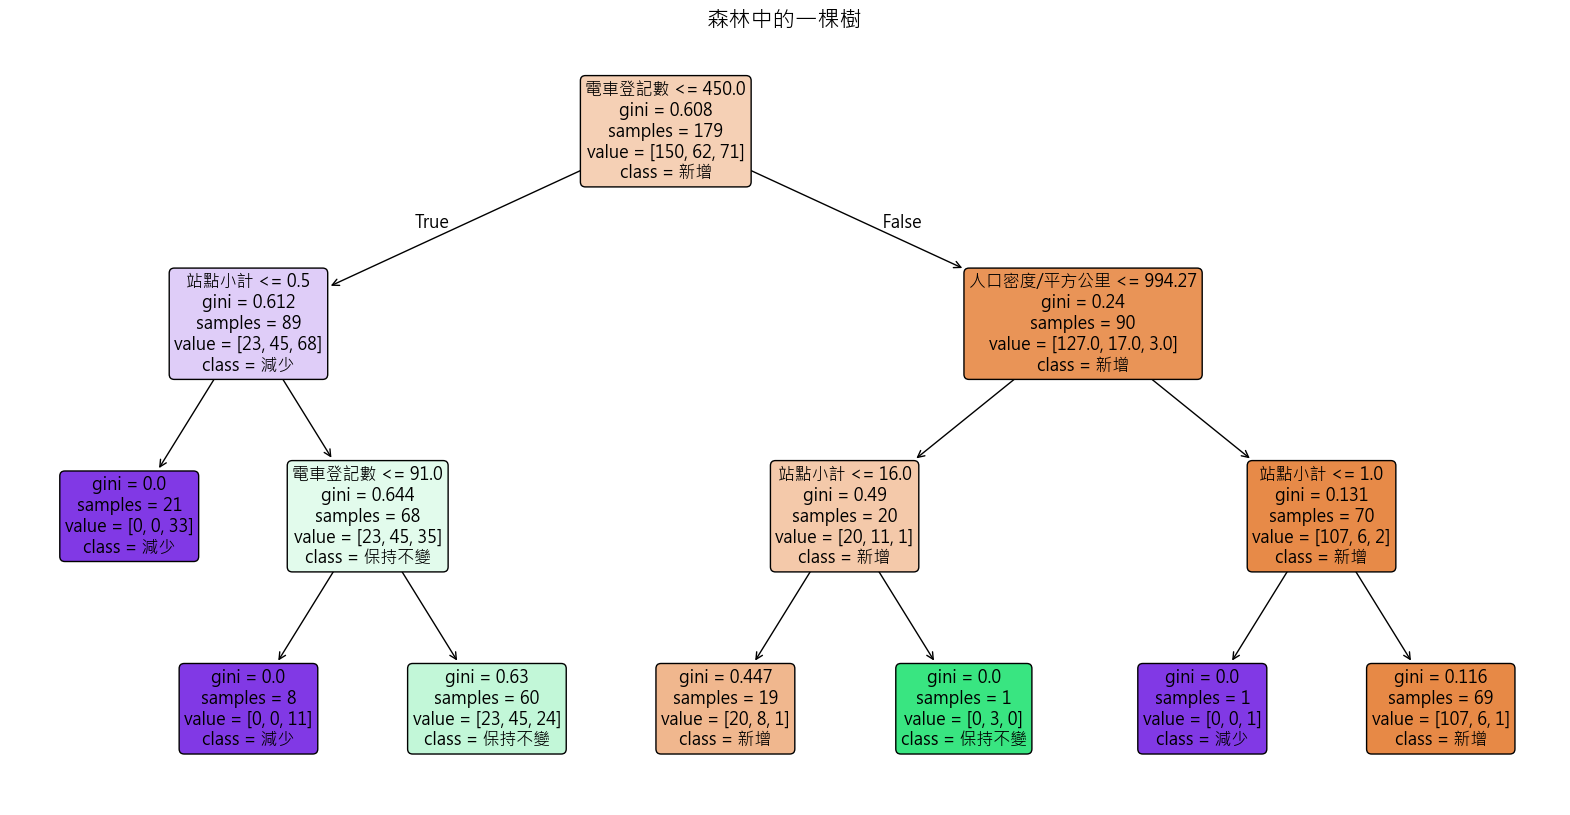

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import cross_val_score   

# Set font to support Chinese characters
matplotlib.rc("font", family="Microsoft JhengHei")

# Load the data
file_path = r"C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\proj_proj\202410合併數據.xlsx"
data = pd.read_excel(file_path)

# Add a new column for the target variable ('新增', '減少', '保持不變')
def classify(row):
    ratio = row['電車登記數'] / row['站點小計'] if row['站點小計'] > 0 else 0
    if ratio < 95:  # 125 - 30 = 95
        return '減少'
    elif ratio > 155:  # 125 + 30 = 155
        return '新增'
    else:
        return '保持不變'

data['決策'] = data.apply(classify, axis=1)

# Encode the target variable
label_map = {'新增': 0, '保持不變': 1, '減少': 2}
data['決策編碼'] = data['決策'].map(label_map)

# Select features and target
features = ['2024人口數', '土地面積', '人口密度/平方公里','電車登記數', '站點小計']
target = '決策編碼'
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=1000,max_features=5)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=label_map.keys())
scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
accuracy = accuracy_score(y_test, y_pred)
print(f'平均準確度: {scores.mean():.2f}')
print(f"模型準確率: {accuracy}")
print(report)


# Visualize one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=features, 
          class_names=list(label_map.keys()), 
          filled=True, 
          rounded=True)
plt.title("森林中的一棵樹", fontsize=16)
plt.show()

